# sklearn库示例

Scikit-learn是针对Python编程语言的免费软件机器学习库。 直接查看[官网](https://scikit-learn.org/stable/)可以清楚地看到其主要功能的展示。它具有各种分类，回归和聚类算法，包括支持向量机，随机森林，梯度提升，k均值和DBSCAN，并且旨在与Python数值和科学库NumPy和SciPy互操作。安装方式如下：

```Shell
conda install -c conda-forge scikit-learn
conda env export > environment.yml
```

首先简单看一张机器学习的图:

![machine-learning](MachineLearningAlgorithms.png)

可以看到很多很多的算法可以使用，sklearn包括其中的一部分。

从实践的角度出发，机器学习要做的工作就是在一个数据集上建立一个或者多个模型，然后对模型进行优化和评估。在sklearn中各个模块到底是什么可以参考这个图：

![](918791-20160810230724965-1004907740.png)

另外，根据官网的介绍，sklearn主要涉及以下几个方面的内容：

- classification 分类
- regression 回归
- clustering 聚类
- dimensionality reduction 降维
- model selection 模型选择
- preprocessing 前处理

算法很多，实际中一般的做法是**API里面找到你要调用的方法，然后可以查看方法参数的情况和使用情况**。也可以在指南里面找到具体的解释。

本文将根据实际使用情况，不定期记录一些常用机器学习方法的实例，关于这些用到的机器学习算法的基本原理，个人记录到[elks repo](https://github.com/OuyangWenyu/elks/tree/master/math-basics/machine-learning)中了。

## Classification

分类是识别一个对象时属于什么类型。应用场景包括垃圾邮件检测，图像识别等。常见的算法包括：SVM，nearest neigbors，random forest等。这里先以最常见的算法之一LDA开始记录。

## Clustering

聚类时自动地对一组对象进行分组。常见应用有顾客行为分析，试验结果分组等。算法包括k-means,spectral clustering, mean-shift等。

先看看最常用的k-means算法的实例。首先，同所有机器学习的过程一样，就是导入数据。先看看kmeans算法的参数要求，因为sklearn库中都是直接调用fit函数来执行算法的，所以直接看fit函数的参数即可：[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

从官方API文档，可以看出X 的shape是 shape=(n_samples, n_features)， y是不需要的，这里只是为了保证API的一致性，所以保留了。接下来看例子。

In [14]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 2])

In [15]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [16]:
kmeans.cluster_centers_

array([[10.,  3.],
       [ 1.,  2.],
       [10.,  0.]])

接下来是一个稍微正式点的例子。

In [6]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
X[:5,:]

Automatically created module for IPython interactive environment


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

然后，定义KMeans算法分类器。执行时调用fit函数即可。最后结果可以从fit后的estimator中通过labels_直接取出。

E:\Programs\anaconda3\envs\hydrus\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


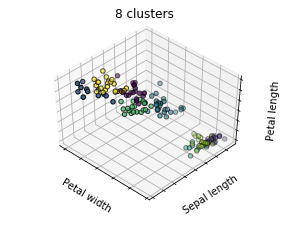

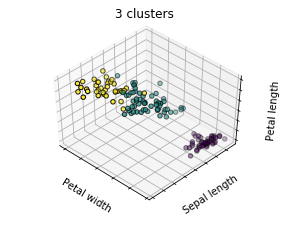

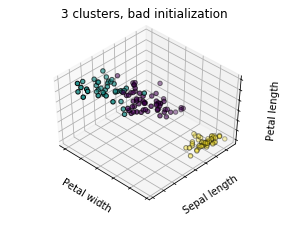

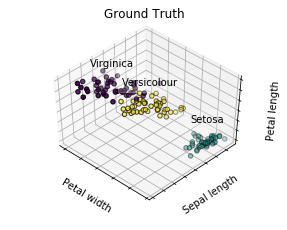

In [10]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## Dimensionality reduction

降维是为了减少变量的数量来把握事物的主要矛盾。常用的算法比如PCA等。

## Model selection

比较，验证和选择模型及其参数是机器学习中非常重要的内容，旨在通过调参来提升模型的性能，常见的算法有 grid search, cross validation, metrics等。

### 交叉验证

In [2]:
"""sklearn常用的一些统计类的方法"""
from sklearn import preprocessing
import numpy as np

""" 预处理数据的方法总结（使用sklearn-preprocessing）"""
# 1. 标准化：去均值，方差规模化
# Found array with dim 3. the scale function expected <= 2 只能处理二维以下的数据
# 创建一组特征数据，每一行表示一个样本，每一列表示一个特征
# Standardization标准化:将特征数据的分布调整成标准正太分布，也叫高斯分布，也就是使得数据的均值维0，方差为1.
# 标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。
# 标准化的过程为两步：去均值的中心化（均值变为0）；方差的规模化（方差变为1）。
# 在sklearn.preprocessing中提供了一个scale的方法，可以实现以上功能。
x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
# 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
x_scale = preprocessing.scale(x)
print(x_scale)

"""交叉验证KFold与StratifiedKFold是有区别的"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# KFold交叉采样：将训练/测试数据集划分n_splits个互斥子集，每次只用其中一个子集当做测试集，剩下的（n_splits-1）作为训练集，进行n_splits次实验并得到n_splits个结果。
# StratifiedKFold分层采样，用于交叉验证：与KFold最大的差异在于，StratifiedKFold方法是根据标签中不同类别占比来进行拆分数据的。
# X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
# X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16]])
X = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]], [[13, 14], [15, 16]]])
# y = np.array([0, 1, 2, 3, 4, 5, 6, 7])
# y = np.array([0, 0, 1, 1])
y = np.array([0, 1, 2, 3])

# skf = StratifiedKFold(n_splits=2)
# n_splits是交叉验证分的个数，也是每个子集包含多少个元素的计算依据
skf = KFold(n_splits=3)
print(skf.get_n_splits(X, y))
print(skf)
# 交叉验证的X、y的维度需要注意，X：array-like, shape (n_samples, n_features)，当X维度较高时，split操作对应的是最外层的两个维度
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("X训练集：", X_train)
    print("X测试集：", X_test)
    print("y训练集：", y_train)
    print("y测试集：", y_test)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
3
KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
X训练集： [[[ 9 10]
  [11 12]]

 [[13 14]
  [15 16]]]
X测试集： [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
y训练集： [2 3]
y测试集： [0 1]
TRAIN: [0 1 3] TEST: [2]
X训练集： [[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[13 14]
  [15 16]]]
X测试集： [[[ 9 10]
  [11 12]]]
y训练集： [0 1 3]
y测试集： [2]
TRAIN: [0 1 2] TEST: [3]
X训练集： [[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
X测试集： [[[13 14]
  [15 16]]]
y训练集： [0 1 2]
y测试集： [3]


## Preprocessing

特征提取，归一化也是机器学习的必修课。比如将文本输入数据转换为机器学习算法所需的输入形式。

## 一些实操技巧

最后补充记录一些数据科学工程实际中用到的小技巧，比如测试，日志等。

本节主要参考：[Unit Testing and Logging for Data Science](https://towardsdatascience.com/unit-testing-and-logging-for-data-science-d7fb8fd5d217)，主要记录在数据科学的代码中，如何进行简单的单元测试以及日志记录。

接下来的实例包括输入-输出单元测试，日志类和 API suitable deployment。使用的数据是 MNIST data-set。

日志是一个decorator，它是一个有日志功能的函数，它包装了其他使用“@my_function” 语法的函数。用这样一个包装器，可以为每个函数创建一个文件日志，每行包括函数的参数。并记录函数运行的时间。

In [3]:
# Decorators
from functools import wraps


def my_logger(orig_func):
    import logging
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper


def my_timer(orig_func):
    import time

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(orig_func.__name__, t2))
        return result

    return wrapper

下面的函数用来下载MNIST数据集，正则化数据，并分为训练集和测试集。

In [9]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

def download():
    mnist = datasets.load_digits()
    X = mnist.data.astype('float64')
    y = mnist.target
    return (X, y) 

class Normalize(object): 
    def normalize(self, X_train, X_test):
        self.scaler = MinMaxScaler()
        X_train = self.scaler.fit_transform(X_train)
        X_test  = self.scaler.transform(X_test)
        return (X_train, X_test) 
    
    def inverse(self, X_train, X_val, X_test):
        X_train = self.scaler.inverse_transform(X_train)
        X_test  = self.scaler.inverse_transform(X_test)
        return (X_train, X_test)   

def split(X,y, splitRatio):
    X_train = X[:splitRatio]
    y_train = y[:splitRatio]
    X_test = X[splitRatio:]
    y_test = y[splitRatio:]
    return (X_train, y_train, X_test, y_test)    

数据科学的任务之一就是创建一个类，并用于生产。因此，设计一个 TheAlgorithm 类，它的结构和sklearn的函数结构相同，fit和predict两个函数，对应训练和测试。每个函数都有“@my_logger” & “@my_timer”装饰器。

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

class TheAlgorithm(object):
  
    @my_logger
    @my_timer
    def __init__(self, X_train, y_train, X_test, y_test):  
        self.X_train, self.y_train, self.X_test, self.y_test = X_train, y_train, X_test, y_test    
        
    @my_logger
    @my_timer
    def fit(self): 
        normalizer = Normalize()
        self.X_train, self.X_test = normalizer.normalize(self.X_train, self.X_test)   
        train_samples = self.X_train.shape[0]
        self.classifier = LogisticRegression(
            C=50. / train_samples,
            multi_class='multinomial',
            penalty='l1',
            solver='saga',
            tol=0.1,
            class_weight='balanced',
            )
        self.classifier.fit(self.X_train, self.y_train)
        self.train_y_predicted = self.classifier.predict(self.X_train)
        self.train_accuracy = np.mean(self.train_y_predicted.ravel() == self.y_train.ravel()) * 100
        self.train_confusion_matrix = confusion_matrix(self.y_train, self.train_y_predicted)        
        return self.train_accuracy
    
    @my_logger
    @my_timer
    def predict(self):
        self.test_y_predicted = self.classifier.predict(self.X_test) 
        self.test_accuracy = np.mean(self.test_y_predicted.ravel() == self.y_test.ravel()) * 100 
        self.test_confusion_matrix = confusion_matrix(self.y_test, self.test_y_predicted)        
        self.report = classification_report(self.y_test, self.test_y_predicted)
        print("Classification report for classifier:\n %s\n" % (self.report))
        return self.test_accuracy

在创建单元测试之前，需要基于数据集的输入输出例子。首先下载MNIST数据集，然后分开成训练和测试，然后创建一个 TheAlgorithm 类变量，并执行fit()函数，观察训练准确度及混淆矩阵。结果会随着模型变化而变化，比如输入切分比率，随机种子等，因此，在模型run之后，为单元测试保存结果，思路是如果 TheAlgorithm 类 有变化，输出就不匹配，测试不通过。对predict函数是类似的。

In [11]:
import numpy as np

#The solution
if __name__ == '__main__': 
    X,y = download()
    print ('MNIST:', X.shape, y.shape)
    
    splitRatio = 60000
    X_train, y_train, X_test, y_test = split(X,y,splitRatio) 

    np.random.seed(31337)
    ta = TheAlgorithm(X_train, y_train, X_test, y_test)
    train_accuracy = ta.fit()
    print()
    print('Train Accuracy:', train_accuracy,'\n') 
    print("Train confusion matrix:\n%s\n" % ta.train_confusion_matrix) 
    test_accuracy = ta.predict()
    print()
    print('Test Accuracy:', test_accuracy,'\n') 
    print("Test confusion matrix:\n%s\n" % ta.test_confusion_matrix)

MNIST: (1797, 64) (1797,)
__init__ ran in: 0.0 sec


ValueError: Found array with 0 sample(s) (shape=(0, 64)) while a minimum of 1 is required.

接下来，做单元测试。一个继承unittest.TestCase的单元测试类：TestInput

在该框架下，可以使用setUpClass, tearDownClass作为类执行前后的两个执行函数，使用setUp, tearDown函数作为每个测试函数执行前后的执行函数。

在setUp中下载数据，分解，并存储混淆矩阵。然后对fit()和predict写测试函数，最后比较结果输出和自己期望的输出。

In [7]:
import unittest

class TestInput(unittest.TestCase):
  
    @classmethod
    def setUpClass(cls):
        # print('setupClass')   
        pass

    @classmethod
    def tearDownClass(cls): 
        # print('teardownClass')
        pass

    def setUp(self):
        print('setUp') 
        X, y = download()
        splitRatio = 60000
        self.X_train, self.y_train, self.X_test, self.y_test = split(X,y,splitRatio) 
        self.train_accuracy = 72.92166666666667
        self.train_confusion_matrix = np.matrix([[5447,   5,  40,  31,  49,  16, 198,  50,  81,   6],
                                                 [   3,6440, 127,  54,   3,  29,  25,  36,  24,   1],
                                                 [ 297, 420,3824, 163, 256,  19, 622, 186, 121,  50],
                                                 [ 124, 221, 255,4566,  54, 251,  97, 129, 275, 159],
                                                 [ 104, 128,  26,  54,4546, 342, 206, 133,  96, 207],
                                                 [ 399, 200, 109,1081, 416,2227, 289, 363, 228, 109],
                                                 [ 173,  89, 112,  55, 156, 229,5034,  25,  45,   0],
                                                 [ 213, 192, 205,  39, 160,  17,  26,5058,  60, 295],
                                                 [  67, 690, 202, 677,  73, 188, 347,  39,3437, 131],
                                                 [ 164, 162,  63, 290, 669, 279, 122, 735, 291,3174]])
        self.test_accuracy = 73.4
        self.test_confusion_matrix = np.matrix([[ 923,   1,   2,   3,   3,   1,  35,   3,   9,   0],
                                                [   0,1084,  23,  11,   0,   0,   5,   4,   8,   0],
                                                [  63,  78, 669,  27,  38,   2,  97,  28,  24,   6],
                                                [  20,  27,  35, 770,   8,  42,  18,  27,  45,  18],
                                                [  15,  21,   3,   8, 750,  60,  45,  23,  18,  39],
                                                [  56,  24,  15, 193,  73, 362,  56,  58,  38,  17],
                                                [  35,  10,  18,  11,  28,  42, 799,   6,   8,   1],
                                                [  23,  40,  52,   6,  21,   4,   7, 821,   8,  46],
                                                [  14,  90,  29,  99,  10,  33,  66,   7, 598,  28],
                                                [  21,  27,  10,  37, 133,  42,  27, 100,  48, 564]])

    def tearDown(self):
        # print('tearDown')
        pass
        
    def test_fit(self):     
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.assertEqual(self.ta.fit(), self.train_accuracy) 
        self.assertEqual(self.ta.train_confusion_matrix.tolist(), self.train_confusion_matrix.tolist())  
  
    def test_predict(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.ta.fit()
        self.assertEqual(self.ta.predict(), self.test_accuracy)
        self.assertEqual(self.ta.train_confusion_matrix.tolist(), self.train_confusion_matrix.tolist()) 

In [8]:
if __name__ == '__main__':
  
    #run tests 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

EE

setUp
setUp



ERROR: test_fit (__main__.TestInput)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-7-7f950f95ae40>", line 17, in setUp
    X, y = download()
NameError: name 'download' is not defined

ERROR: test_predict (__main__.TestInput)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-7-7f950f95ae40>", line 17, in setUp
    X, y = download()
NameError: name 'download' is not defined

----------------------------------------------------------------------
Ran 2 tests in 0.005s

FAILED (errors=2)
